=== Reporte de Clasificación - SVM con texto preprocesado ===
                   precision    recall  f1-score   support

 Derecho de autor       0.98      1.00      0.99        46
Derechos de autor       0.00      0.00      0.00         1
            Marca       1.00      1.00      1.00        40
          Patente       1.00      1.00      1.00        35

         accuracy                           0.99       122
        macro avg       0.74      0.75      0.75       122
     weighted avg       0.98      0.99      0.99       122



C:\Users\Elvis\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Elvis\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Elvis\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

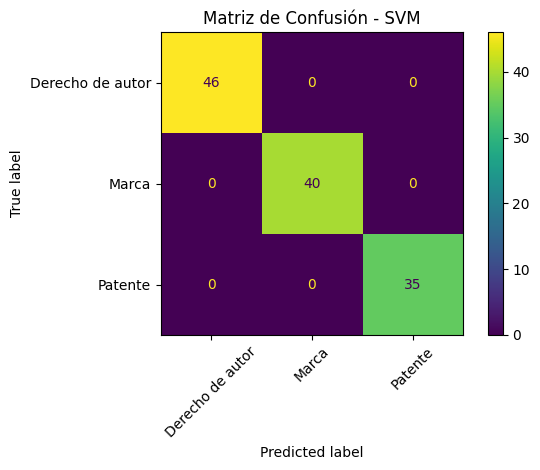

['vectorizer_tfidf.pkl']

In [2]:
import pandas as pd
import spacy
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import joblib

# Cargar modelo de spaCy en español
nlp = spacy.load("es_core_news_sm")

# Función para preprocesar: lematización y eliminación de stopwords/puntuación
def preprocesar(texto):
    doc = nlp(texto.lower())
    return " ".join([token.lemma_ for token in doc if not token.is_stop and not token.is_punct])

# Leer archivo CSV y aplicar preprocesamiento
df = pd.read_csv('./activos_pi_2.csv', encoding='latin1')
df["descripcion"] = df["descripcion"].apply(preprocesar)

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(df["descripcion"], df["categoria"], test_size=0.2, random_state=42)

# Vectorización TF-IDF con texto limpio
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Modelo SVM
clf = SVC(kernel='linear', C=1.0, random_state=42)
clf.fit(X_train_tfidf, y_train)

# Predicción y métricas
y_pred = clf.predict(X_test_tfidf)
print("=== Reporte de Clasificación - SVM con texto preprocesado ===")
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(xticks_rotation=45)
plt.title("Matriz de Confusión - SVM")
plt.tight_layout()
plt.show()

# Guardar modelo
joblib.dump(clf, "modelo_svm.pkl")
joblib.dump(vectorizer, "vectorizer_tfidf.pkl")




In [7]:
# Prueba con una nueva descripción
nueva_descripcion = ["un dispositivo mejorado para la comunicación"]
descripcion_proc = [preprocesar(nueva_descripcion[0])]
nueva_tfidf = vectorizer.transform(descripcion_proc)
prediccion = clf.predict(nueva_tfidf)[0]

print("Descripción:", nueva_descripcion[0])
print("Predicción de categoría:", prediccion)

Descripción: un dispositivo mejorado para la comunicación
Predicción de categoría: Patente


In [8]:
# Prueba con una nueva descripción
nueva_descripcion = ["logotipo para mi empresa de tecnología"]
descripcion_proc = [preprocesar(nueva_descripcion[0])]
nueva_tfidf = vectorizer.transform(descripcion_proc)
prediccion = clf.predict(nueva_tfidf)[0]

print("Descripción:", nueva_descripcion[0])
print("Predicción de categoría:", prediccion)

Descripción: logotipo para mi empresa de tecnología
Predicción de categoría: Marca


In [9]:
# Prueba con una nueva descripción
nueva_descripcion = ["un software de gestión de proyectos"]
descripcion_proc = [preprocesar(nueva_descripcion[0])]
nueva_tfidf = vectorizer.transform(descripcion_proc)
prediccion = clf.predict(nueva_tfidf)[0]

print("Descripción:", nueva_descripcion[0])
print("Predicción de categoría:", prediccion)

Descripción: un software de gestión de proyectos
Predicción de categoría: Derecho de autor


In [11]:
# Prueba con una nueva descripción
nueva_descripcion = ["patente"]
descripcion_proc = [preprocesar(nueva_descripcion[0])]
nueva_tfidf = vectorizer.transform(descripcion_proc)
prediccion = clf.predict(nueva_tfidf)[0]

print("Descripción:", nueva_descripcion[0])
print("Predicción de categoría:", prediccion)

Descripción: patente
Predicción de categoría: Derecho de autor
